<a href="https://colab.research.google.com/github/estefaniabrito/SYS/blob/main/Ejercicios_Laplace.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Universidad Nacional de Colombia
**Ejercicios La Place**

Señales y sistemas

Estefanía Ramirez Brito

Andres Marino Alvarez Meza

2024-2


##Ejercicio 1
![Ilustración de los polos y ceros en un gráfico de polos y ceros](https://github.com/amalvarezme/SenalesSistemas/blob/master/4_Transformada_Laplace/pz_plot.png?raw=1)

* Obtenga $X(s)$ junto con su ROC de la anterior gráfica de polos y ceros.


In [1]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import tf2zpk


s = sp.symbols('s', complex=True)
K=2
X_s=K*(s+2)/(s**2+1)
print ("X(s)=",sp.simplify(X_s))
num=[2,4]
den=[1,0,1]
zeros,poles,gain=tf2zpk(num,den)
print ("Zeros=",zeros)
print ("Poles=",poles)
print ("Gain=",gain)
real= np.linspace(-3,3,400)
imag= np.linspace(-3,3,400)
X,Y=np.meshgrid(real,imag)
Z=X+Y*1j
H=2*(Z+2)/(Z**2+1)
roc="Re(s)>0 ·suponiendo un  sistema causal"
print ("La regiòn de convergencia ROC es:",roc)

X(s)= 2*(s + 2)/(s**2 + 1)
Zeros= [-2.]
Poles= [-0.+1.j  0.-1.j]
Gain= 2.0
La regiòn de convergencia ROC es: Re(s)>0 ·suponiendo un  sistema causal


**Ejercicio 2**

* Determinar los polos y ceros de la transformada de Laplace $\mathsf{L} \{ \epsilon(t) \cdot \sin(\omega_0 t) \}$ mediante el cálculo manual y extendiendo el ejemplo anterior. Qué simetría muestran los polos y los ceros en el plano $s$?

**link de la imagen que contiene el cálculo manual**
https://drive.google.com/file/d/1aSgpk0TIzpMJjrGaMN-TIiAtJqtaqbMJ/view?usp=drive_link

Los polos muestran simetría con respecto al eje real ya que los polos aparecen en pares conjugados complejos. No se tiene una simetría en los ceros ya que por cuestiones del numerador no los hay


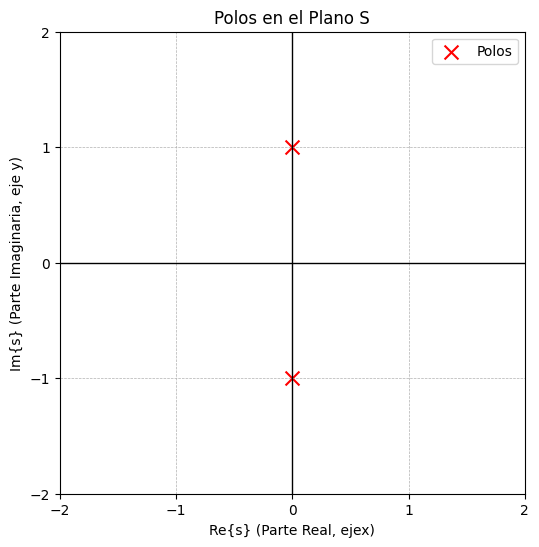

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Definir la frecuencia omega_0
omega_0 = 1  # Puedes cambiar este valor según sea necesario

# Definir los polos
poles = [1j * omega_0, -1j * omega_0]  # Polos en ±jω0

# Crear la gráfica del plano complejo
fig, ax = plt.subplots(figsize=(6, 6))
ax.axhline(0, color='black', linewidth=1)  # Eje real
ax.axvline(0, color='black', linewidth=1)  # Eje imaginario

# Graficar los polos
ax.scatter([p.real for p in poles], [p.imag for p in poles], color='red', marker='x', s=100, label='Polos')

# Etiquetas
ticks = np.arange(-2, 3, 1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xlabel('Re{s} (Parte Real, ejex)')
ax.set_ylabel('Im{s} (Parte Imaginaria, eje y)')
ax.set_title('Polos en el Plano S')
ax.legend()
ax.grid(True, linestyle='--', linewidth=0.5)

# Límites del gráfico
ax.set_xlim(-2, 2)
ax.set_ylim(-2, 2)

# Mostrar la gráfica
plt.show()


##**Ejercicio 3**

* Obtener la transformada inversa de Laplace de $X(s)$ manualmente.
* Obtener la transformada inversa de Laplace de
    \begin{equation}
    X(s) = \frac{1}{(s+1)(s+2)^2} \qquad \text{for } \Re \{ s \} \geq -1
    \end{equation}
    manualmente. Comprobar los resultados utilizando `SymPy`.

**Cálculos manuales primer punto**
https://drive.google.com/file/d/1HJsmm1n3K_jU5Zsvmk2cHvC0WM_DACni/view?usp=drive_link

---
**Cálculos manuales segundo punto**
https://drive.google.com/file/d/1f0qbRvhrGppS7sbdaKUGKM3MSmZTIEU_/view?usp=drive_link


In [6]:
#Comprobación con Sympy
%matplotlib inline
import sympy as sym
sym.init_printing()

s = sym.symbols('s', complex=True)
t = sym.symbols('t', real=True)

X = (1)/((s+1)*(s+2)**2)
X


       1        
────────────────
               2
(s + 1)⋅(s + 2) 

In [7]:
sym.inverse_laplace_transform(X, s, t).simplify()

⎛      t    ⎞  -2⋅t     
⎝-t + ℯ  - 1⎠⋅ℯ    ⋅θ(t)

Pintamos para observar como se comporta de manera gráfica el ejercicio propuesto.

In [10]:
poles = sym.roots(sym.denom(X))
poles

{-2: 2, -1: 1}

In [11]:
A, B, C = sym.symbols('A B C', real=True)
#expresión en fracciones parciales
Xp = A / (s+1) + (B)/(s+2) + (C)/(s+2)**2
#resolver coeficientes por igualación de expresiones
coeffs = sym.solve(sym.Eq(X, Xp), (A, B, C))
coeffs

{A: 1, B: -1, C: -1}

In [12]:
Xp = Xp.subs(coeffs)
Xp

    1        1         1  
- ───── - ──────── + ─────
  s + 2          2   s + 1
          (s + 2)         

In [15]:
x1 = sym.inverse_laplace_transform(Xp.args[0], s, t) #trasformada inversa del segundo componente
x1

 -t     
ℯ  ⋅θ(t)

In [16]:
x2 = sym.inverse_laplace_transform(Xp.args[1], s, t)#transformada inversa del segundo componente
x2

  -2⋅t     
-ℯ    ⋅θ(t)

In [17]:
x2 = sym.inverse_laplace_transform(Xp.args[2], s, t)#transformada inversa del tercer componente
x2

    -2⋅t     
-t⋅ℯ    ⋅θ(t)

In [18]:
x = x1 + x2
x

     -2⋅t         -t     
- t⋅ℯ    ⋅θ(t) + ℯ  ⋅θ(t)

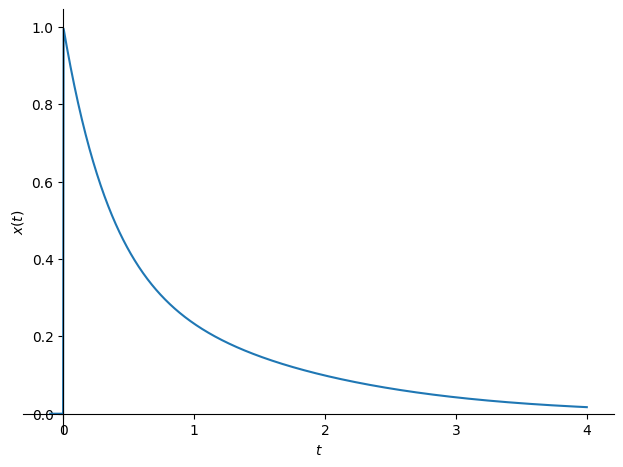

In [19]:
sym.plot(x, (t, -0.1, 4), xlabel='$t$', ylabel='$x(t)$');

##**Ejercicio 4**

* Qué relación tiene $\lambda$ con el la salida obtenida al resolver la EDO?

Si la entrada es \$x(t)$=\$e^st\$, se busca una solución de la forma:

$y(t)$=  $λe^st$

\$a_0λe^st+a_1sλe^st+a_2s^2λe^st=e^st$

asumiendo que $e^st \neq 0$:
$λ(a_0+a_1s+a_2s^2)=1$

De donde λ= $ \frac {1}{(a_0+a_1s+a_2s^2)}$

Teniendo en cuenta la teoría previa se dice que:

λ=$\ e^{s\tau}$

$ \frac {1}{(a_0+a_1s+a_2s^2)}$=$\ e^{s\tau}$

$s\tau$=$Ln(\frac {1}{(a_0+a_1s+a_2s^2)})$

Finalmente:

$\tau$=$- \frac{1}{s}*Ln(a_0+a_1s+a_2s^2)$

El parámetro λ representa el factor de atenuación o eslacamiento que relaciona la salida con una entrada exponencial, en el análisis de la ecuación diferencial este factor está determinado por la respuesta en frecuencia del sistema dada por la función de transferencia:

$H(s)$= $\frac {1}{(a_0+a_1s+a_2s^2)}$
